<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/main/UAS/UAS_Machine_Learning_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arya Fridayana Gastiadi

1103210082

UAS Machine Learning

Dataset: mnist, Model: CNN

Referensi : https://www.tensorflow.org/datasets/catalog/mnist?hl=id & https://www.youtube.com/watch?v=Rf5bSKrLsnk

In [ ]:
# Import library TensorFlow
import tensorflow as tf
# Import library numpy dan mengatur opsi tampilan
import numpy as np
np.set_printoptions(linewidth=200)
# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
#Memuat Data
(train_X,train_y),(test_X, test_y)= mnist.load_data()

In [ ]:
#Mencetak bentuk (shape)
print("Train: ")
print(train_X.shape)
print(train_y.shape)
print("Test: ")
print(test_X.shape)
print(test_y.shape)

Train: 
(60000, 28, 28)
(60000,)
Test: 
(10000, 28, 28)
(10000,)


Penjelasan: bertujuan untuk mencetak ukuran (shape) dari dataset pelatihan (train) dan dataset pengujian (test). Ini merupakan langkah penting dalam proses pembelajaran mesin (machine learning) karena memahami ukuran dataset membantu memastikan bahwa data telah diproses dengan benar dan siap digunakan dalam model pembelajaran mesin.

In [ ]:
#split data
# Mengambil 100 data pertama dari set pelatihan dan set pengujian
num_train = 100
train_X = train_X[:num_train]
train_y = train_y[:num_train]
num_test = 100
test_X = test_X[:num_test]
test_y = test_y[:num_test]

Penjelasan: mengambil 100 data pertama dari dataset pelatihan (train) dan dataset pengujian (test). Dimana ini berguna untuk mengambil subset data yang lebih kecil untuk pengujian atau pelatihan cepat

3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246  14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  55 251 169   1 

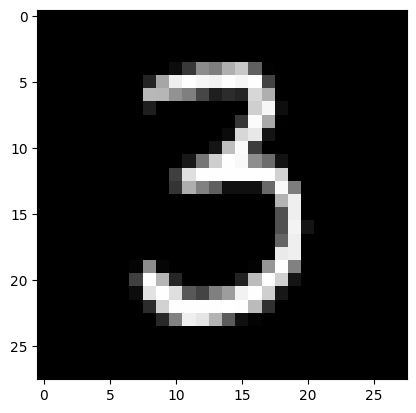

In [ ]:
# Menentukan indeks data yang akan ditampilkan
index = 50
# Menampilkan gambar pada indeks yang ditentukan dari set pelatihan
plt.imshow(train_X[index], cmap='gray')
# Mencetak label dari data pada indeks yang ditentukan
print(train_y[index])
# Mencetak nilai piksel dari gambar pada indeks yang ditentukan
print(train_X[index])

Penjelasan: untuk menampilkan gambar pada indeks tertentu dari dataset pelatihan, mencetak labelnya, serta mencetak nilai piksel dari gambar tersebut

#CNN

In [ ]:
# Load dataset MNIST
mnist = tf.keras.datasets.mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
# Preprocess dataset
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1)) / 255.0
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1)) / 255.0

Penjelasan: melakukan pra-pemrosesan data pada dataset pelatihan dan pengujian sebelum digunakan dalam model pembelajaran mesin, khususnya untuk tugas pengenalan gambar (misalnya, dataset MNIST)

In [ ]:
# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer dengan 32 filter 3x3 dan ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer dengan filter 2x2
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer dengan 64 filter 3x3 dan ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer dengan filter 2x2
    Flatten(),  # Meratakan output dari lapisan sebelumnya menjadi vektor
    Dense(128, activation='relu'),  # Fully connected layer dengan 128 unit dan ReLU activation
    Dense(10, activation='softmax')  # Output layer dengan 10 unit untuk klasifikasi 10 kategori dan softmax activation
])

Penjelasan: model ini memiliki dua lapisan konvolusi (Conv2D) yang diikuti oleh lapisan max pooling (MaxPooling2D), kemudian diikuti oleh lapisan Flatten, lapisan Fully Connected (Dense), dan lapisan output dengan fungsi aktivasi softmax untuk klasifikasi multi-kelas. Model ini dirancang untuk melakukan klasifikasi gambar dalam dataset MNIST atau dataset serupa.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Penjelasan: Jadi, dengan menggunakan konfigurasi ini, model akan dijalankan dengan optimizer Adam, menggunakan fungsi loss sparse_categorical_crossentropy, dan diukur kinerjanya menggunakan metrik 'accuracy'. Konfigurasi ini umum digunakan dan cocok untuk sebagian besar kasus klasifikasi.

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1264 - accuracy: 0.9611 - val_loss: 0.0533 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0408 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0290 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0272 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0290 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0374 -

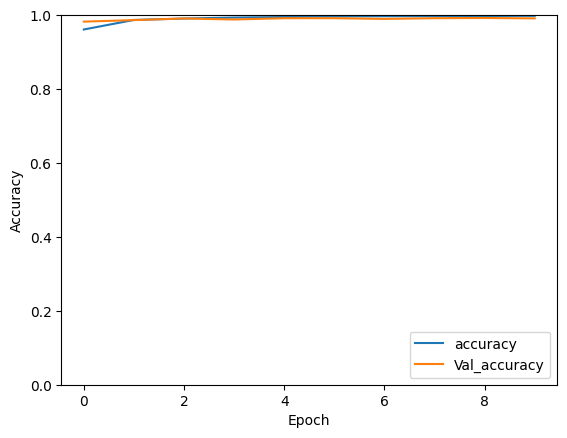

In [ ]:
# Train the model
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')  # Akurasi pelatihan
plt.plot(history.history['val_accuracy'], label='Val_accuracy')  # Akurasi validasi
plt.xlabel('Epoch')  # Label sumbu X
plt.ylabel('Accuracy')  # Label sumbu Y
plt.ylim([0, 1])  # Rentang sumbu Y dari 0 hingga 1
plt.legend(loc='lower right')  # Menampilkan legenda di sudut kanan bawah grafik
plt.show()  # Menampilkan grafik

Penjelasan: melatih model menggunakan data pelatihan train_X dan train_y, dengan melakukan 10 epoch (putaran) pada proses pelatihan. Setiap epoch, model akan mengoptimalkan parameter-parameternya untuk meningkatkan akurasi prediksi terhadap data pelatihan. Selain itu, proses validasi juga dilakukan pada data validasi test_X dan test_y, sehingga bisa melihat bagaimana performa model di luar data pelatihan.

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_X, test_y)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 5s 14ms/step - loss: 0.0375 - accuracy: 0.9912
Test accuracy: 0.9911999702453613
